In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac=1, random_state=3) #shuffling data

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

1. with heart disease: 644
2. without heart disease: 3596

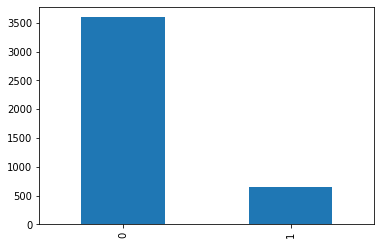

In [5]:
df['TenYearCHD'].value_counts().plot.bar()
plt.show()

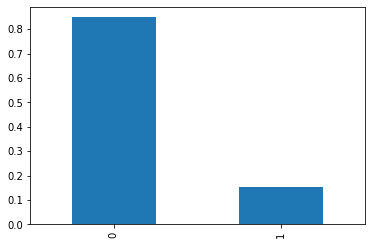

In [6]:
df['TenYearCHD'].value_counts(normalize=True).plot.bar()  #normalize used to get proportions
plt.show()

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
ms = df.isnull().sum()
ms[ms>0] #displaying only features with missing values

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

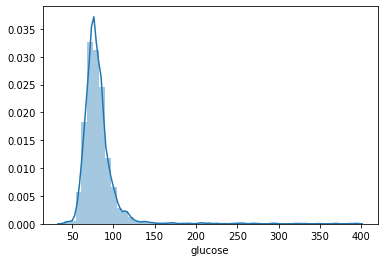

In [9]:
sns.distplot(df['glucose'].dropna())
plt.show()

In [10]:
df['glucose'].describe()

count    3852.000000
mean       81.963655
std        23.954335
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

Note: 
1. to maintain distribution of all data use forward fill or backward fill instead of median
2. fill and bfill might affect the sorting if any was already there in the data: so shuffle data initially to remove the sortinf present if any.

In [11]:
df = df.fillna(method='ffill')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


In [25]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis = 1)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(solver='liblinear')

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [32]:
def model_eval(algorithm, Xtrain, ytrain, Xtest, ytest):
    algorithm.fit(Xtrain, ytrain) 
    ytrain_pred = algorithm.predict(Xtrain)
    ytrain_prob = algorithm.predict_proba(Xtrain)[:,1]

    print('Confusion matrix - train dataset:', '\n', confusion_matrix(ytrain, ytrain_pred))
    print('Overall accuracy of model - train dataset:', accuracy_score(ytrain, ytrain_pred))
    print('AUC Score - train dataset:', roc_auc_score(ytrain, ytrain_prob))

    print('\n')

    ytest_pred = algorithm.predict(Xtest)
    ytest_prob = algorithm.predict_proba(Xtest)[:,1]

    print('Confusion matrix - test dataset:', '\n', confusion_matrix(ytest, ytest_pred))
    print('Overall accuracy of model - test dataset:', accuracy_score(ytest, ytest_pred))
    print('AUC Score - test dataset:', roc_auc_score(ytest, ytest_prob))

    fpr,tpr,thresholds = roc_curve(ytest, ytest_prob)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr,'r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

Confusion matrix - train dataset: 
 [[2520   13]
 [ 400   35]]
Overall accuracy of model - train dataset: 0.8608490566037735
AUC Score - train dataset: 0.7313212718551896


Confusion matrix - test dataset: 
 [[1060    3]
 [ 200    9]]
Overall accuracy of model - test dataset: 0.8404088050314465
AUC Score - test dataset: 0.699491823718194


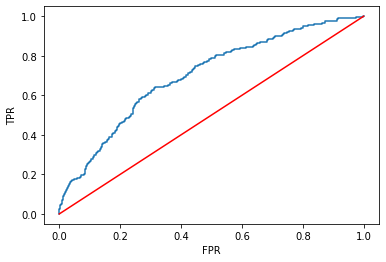

In [33]:
model_eval(lr, X_train, y_train, X_test, y_test)

### Undersampling Majority Class

In [42]:
Xytrain = pd.concat([X_train, y_train], axis = 1) #merge X_train and y_train to make one dataset

print('Before Undersampling: ', '\n',  Xytrain['TenYearCHD'].value_counts())

Xytrain0 = Xytrain[Xytrain['TenYearCHD']==0]
Xytrain1 = Xytrain[Xytrain['TenYearCHD']==1]

len0 = len(Xytrain0)
len1 = len(Xytrain1)

Xytrain0_us = Xytrain0.sample(len1, random_state=3) #random_state given here to get similar result
#undersampled zero data: made it smaller

Xytrain_us = pd.concat([Xytrain0_us, Xytrain1], axis = 0) # not merging; vertically appending

print('\n')
print('After undersampling: ', '\n', Xytrain_us['TenYearCHD'].value_counts())

Before Undersampling:  
 0    2533
1     435
Name: TenYearCHD, dtype: int64


After undersampling:  
 1    435
0    435
Name: TenYearCHD, dtype: int64


In [43]:
y_train_us = Xytrain_us['TenYearCHD']
X_train_us = Xytrain_us.drop('TenYearCHD', axis=1)

#splitting target to x and y

Confusion matrix - train dataset: 
 [[291 144]
 [137 298]]
Overall accuracy of model - train dataset: 0.6770114942528735
AUC Score - train dataset: 0.7480089840137403


Confusion matrix - test dataset: 
 [[706 357]
 [ 75 134]]
Overall accuracy of model - test dataset: 0.660377358490566
AUC Score - test dataset: 0.7068871614596228


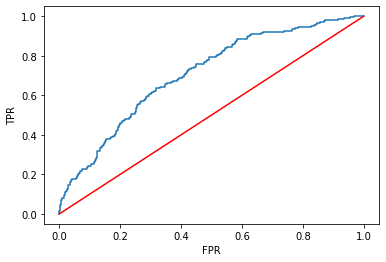

In [46]:
# Model Evaluation again

model_eval(lr, X_train_us, y_train_us, X_test, y_test)

### Oversampling Minority Class

In [49]:
Xytrain = pd.concat([X_train, y_train], axis=1)

print('Before oversampling:', '\n', Xytrain['TenYearCHD'].value_counts())

Xytrain0 = Xytrain[Xytrain['TenYearCHD']==0]
Xytrain1 = Xytrain[Xytrain['TenYearCHD']==1]

len0 = len(Xytrain0)
len1 = len(Xytrain1)

Xytrain1_os = Xytrain1.sample(len0, replace=True, random_state=3) #oversampled ones data: made it bigger

Xytrain_os = pd.concat([Xytrain0, Xytrain1_os], axis = 0) #not merging; vertically appending

print('\n')
print('After undersampling: ', '\n', Xytrain_os['TenYearCHD'].value_counts())

Before oversampling: 
 0    2533
1     435
Name: TenYearCHD, dtype: int64


After undersampling:  
 1    2533
0    2533
Name: TenYearCHD, dtype: int64


In [50]:
y_train_os = Xytrain_os['TenYearCHD']
X_train_os = Xytrain_os.drop('TenYearCHD', axis=1)

Confusion matrix - train dataset: 
 [[1717  816]
 [ 797 1736]]
Overall accuracy of model - train dataset: 0.6816028424792736
AUC Score - train dataset: 0.7350937619475042


Confusion matrix - test dataset: 
 [[719 344]
 [ 71 138]]
Overall accuracy of model - test dataset: 0.6737421383647799
AUC Score - test dataset: 0.7098173896213208


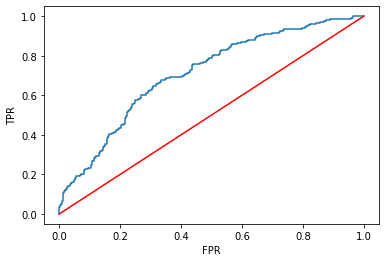

In [52]:
model_eval(lr, X_train_os, y_train_os, X_test, y_test)

### Oversampling Minority Class using SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE(sampling_strategy='minority', random_state=3)

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [73]:
y_train_sm.value_counts()

1    2533
0    2533
Name: TenYearCHD, dtype: int64

Confusion matrix - train dataset: 
 [[1724  809]
 [ 770 1763]]
Overall accuracy of model - train dataset: 0.6883142518752468
AUC Score - train dataset: 0.7501398437584017


Confusion matrix - test dataset: 
 [[714 349]
 [ 97 112]]
Overall accuracy of model - test dataset: 0.64937106918239
AUC Score - test dataset: 0.6513793677728915


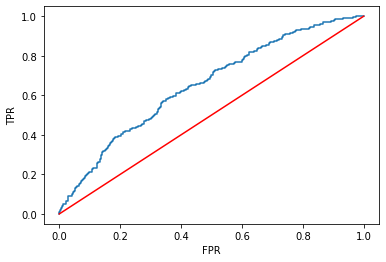

In [74]:
model_eval(lr, X_train_sm, y_train_sm, X_test, y_test)